# Dimensionality Reduction

Imagine the scenario, what happens when the dataset has many variables (features) ? What is the best way to visualize such higher dimensional data?

Here are few possible situations which you might come accross:
* You find that most of the variables are correlated.
* You lose patience and decide to run a model on the whole data. This returns poor accuracy and you feel terrible.
* You become indecisive about what to do.
* You start thinking of some strategic method to find few important features.

Statistical Techniques such as factor analysis and principal component analysis help to overcome such difficulties.

## Principal Component Analysis

In simple words , PCA is a method of extracting important features from a large set of features available in a data set. It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible. With fewer crucial features, visualization also becomes much more meaningful. PCA is more useful when dealing with 3 or higher dimensional data.

It is always performed on a ___symmetic correlation or covariance matrix___. This means the matrix should be numeric and have standardized data.

Let's say we have a data set of dimension 300(m) x 50(n). m represents the number of observations and n represents number of features. Since we have a large n=50, there can be $n\frac{(n-1)}{2}$ scatter plots i.e more than 1000 plots possible to analyze the variable relationship. Wouldn't it be a tedious job to perform exploratory data analysis on this data?

In this case, it would be a lucid approach to slect a subset of n (n << 50) features which captures as much information. Followd by plotting the observation in the resultant low dimensional space.

For Inuition, [Click Here](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/140579#140579)



## Load MNIST Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv("datasets/train.csv")
labels = dataframe["label"]
mnist = dataframe.drop("label", axis=1)

In [3]:
print(mnist.shape)
print(labels.shape)

(42000, 784)
(42000,)


/home/ashish/.virtualenvs/ai_venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


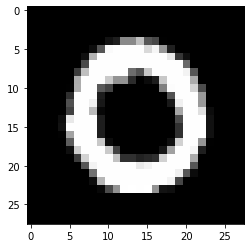

0


In [5]:
# Display or Plot a data-point (number)

plt.figure(figsize=(4,4))
index = 1

grid_data = mnist.iloc[index].as_matrix().reshape(28,28)
plt.imshow(grid_data, interpolation="none", cmap="gray")
plt.show()

print(labels[index])

## 2D Visualization using PCA

In [6]:
# Pick first 15k data-points to work on for time-efficiency
# Excercise: Perform the same analysis on all 42k data-points

labels = labels.head(15000)
data = mnist.head(15000)
print(f"The shape of sample data is: {data.shape}")


The shape of sample data is: (15000, 784)


In [7]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)

print(standardized_data.shape)

(15000, 784)


In [8]:
# Find the co-variance matrix which is: X^T * X
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

print(f"The shape of co-variance matrix (S): {covar_matrix.shape}")

The shape of co-variance matrix (S): (784, 784)


In [9]:
# Finding the top two eigen-values and corresponding eigen-vectors
# for projecting onto a 2D space

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value)
# eigh function will return eigen values in ascending order
# this code generates the top 2 ( 782, 783) indexed eigen values.

values, vectors = eigh(covar_matrix, eigvals=(782, 783))

print(f"Shape of eigen vectors: {vectors.shape}")

# converting the eigen vectors into (2, d)
vectors = vectors.T

print(f"Updated shape of eigen vectors: {vectors.shape}")

# Here the vector[1] represent the eigen vector corresponding to 1st Principal eigen vector and so on.

Shape of eigen vectors: (784, 2)
Updated shape of eigen vectors: (2, 784)


In [10]:
# Projecting the original data sample on the plane
# form by two principal eigen vectors by vector-vector multiplication

new_coordinates = np.matmul(vectors, sample_data.T)

print(f"Resultant new data-points' shape: {vectors.shape} 'X' {sample_data.T.shape} '=' {new_coordinates.shape}")

Resultant new data-points' shape: (2, 784) 'X' (784, 15000) '=' (2, 15000)


In [11]:
# Appending label to the 2D projected data

new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled data points
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
dataframe.head()

,1st_principal,2nd_principal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


/home/ashish/.virtualenvs/ai_venv/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


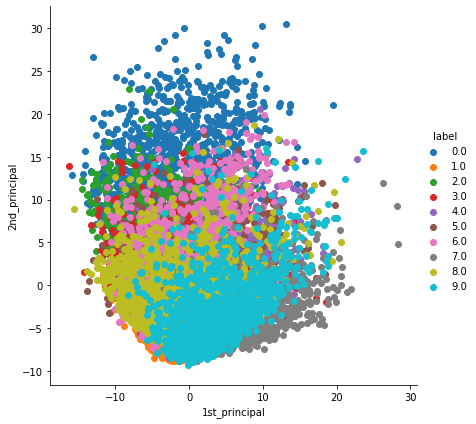

In [12]:
# plotting the 2D data points with seaborn

import seaborn as sns

sns.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, "1st_principal", '2nd_principal').add_legend()
plt.show()